In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gspread
from oauth2client.service_account import ServiceAccountCredentials

scope = ['https://spreadsheets.google.com/feeds']
credentials = ServiceAccountCredentials.from_json_keyfile_name('ovmarkets-3dd85aa5a711.json', scope)

gc = gspread.authorize(credentials)

wks = gc.open("Indicator matching").get_worksheet(0)
dataframe = pd.DataFrame(wks.get_all_records())

In [3]:
dataframe_trim = dataframe.iloc[0:-650, 1:]#.tail(5)

In [4]:
dataframe_trim_bin = dataframe_trim.applymap(lambda x: 1 if x != '' else np.nan)
dataframe_trim_bin.loc[:, 'Category'] = dataframe_trim.loc[:, 'Category']
dataframe_trim_bin.loc[:, 'Abstract Indicator Name'] = dataframe_trim.loc[:, 'Abstract Indicator Name']

In [5]:
dataframe_trim_bin_inx = dataframe_trim_bin.copy()
dataframe_trim_bin_inx = dataframe_trim_bin_inx.set_index(['Category', 'Abstract Indicator Name'])

In [6]:
dataframe_map = dataframe_trim_bin.groupby(['Category', 'Abstract Indicator Name']).sum()

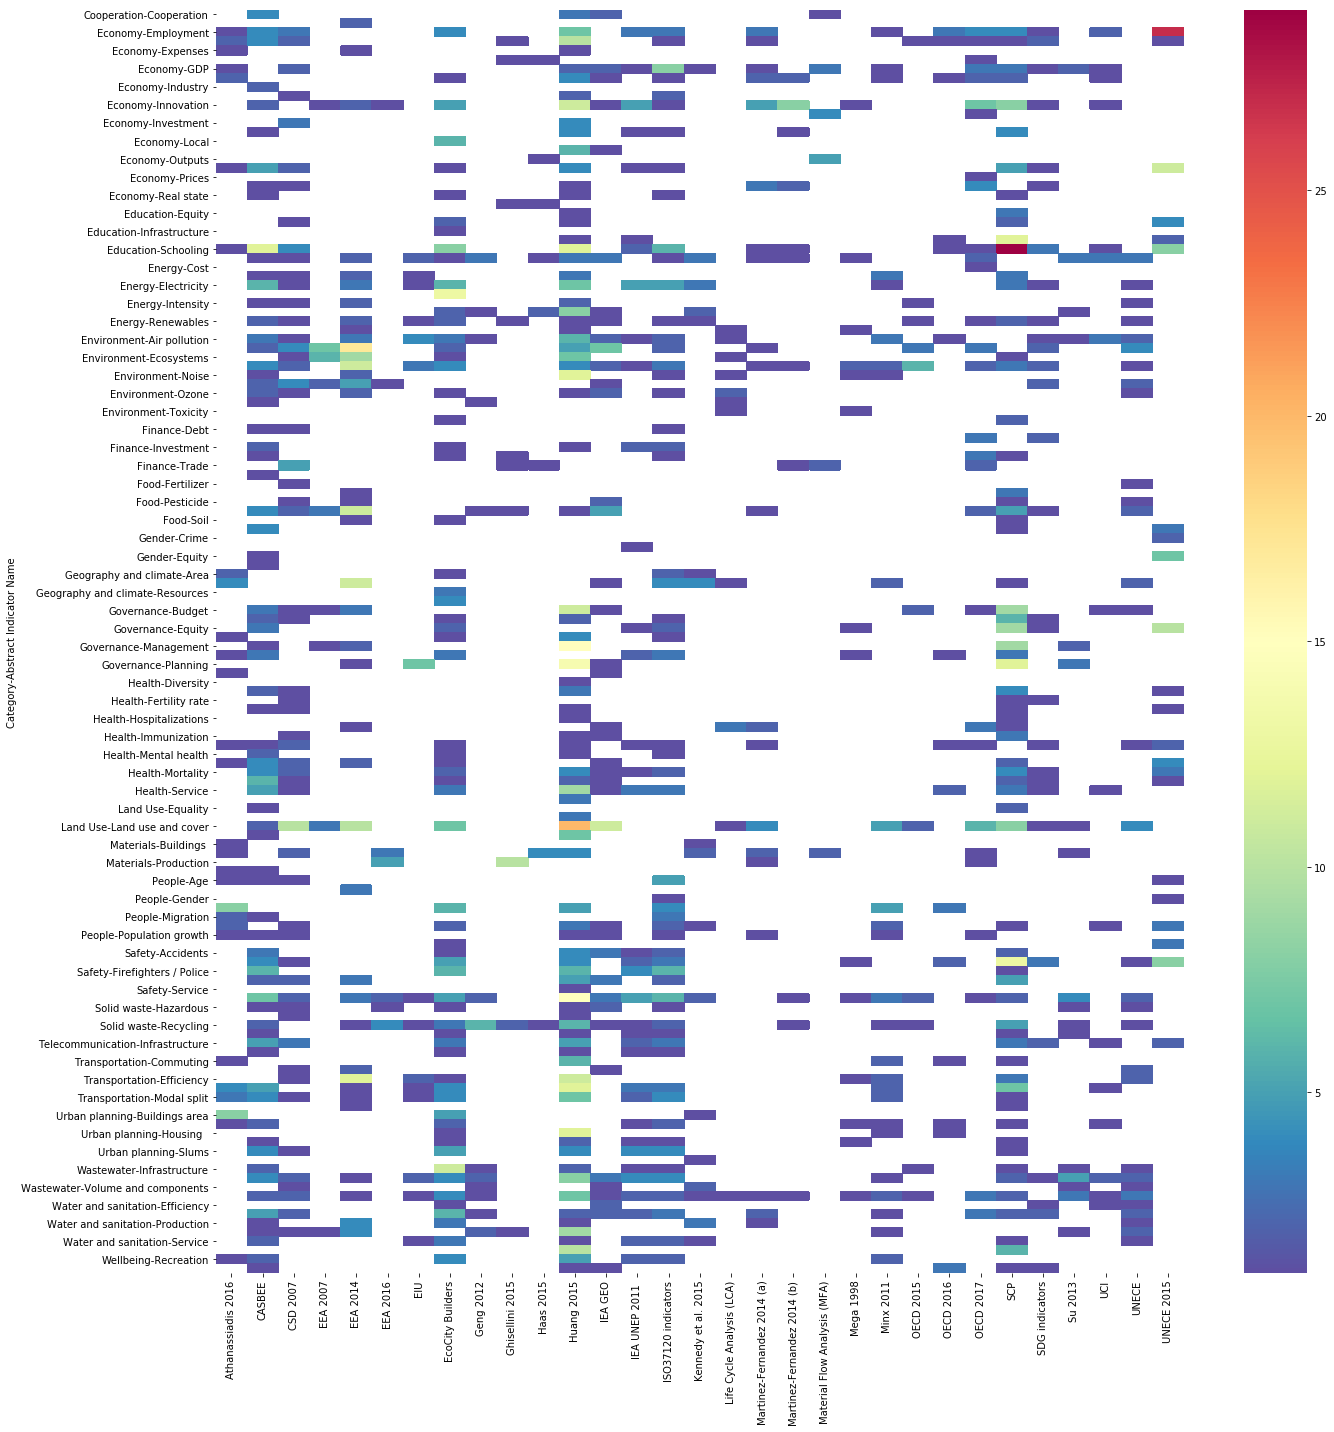

In [7]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(dataframe_map, annot=False, ax=ax, cmap='Spectral_r', square=False)#, vmin=1, vmax=10)
fig.tight_layout()
plt.savefig("heatmap.png", dpi=300)

In [8]:
dataframe_map_cat = dataframe_trim_bin.groupby(['Category']).sum()

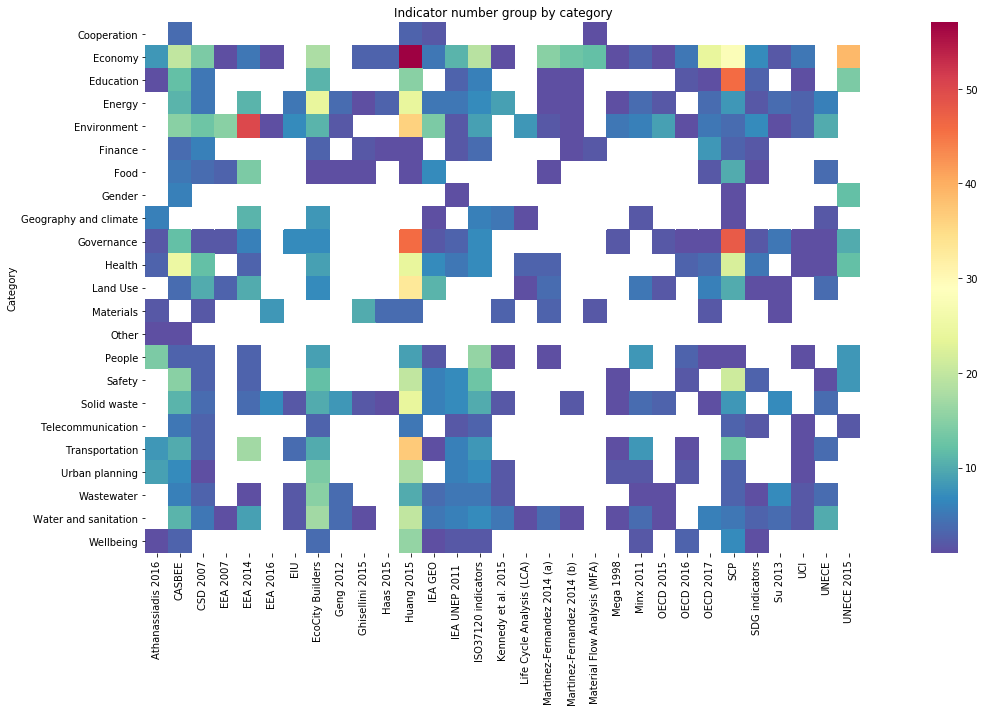

In [9]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(dataframe_map_cat, annot=False, ax=ax, cmap='Spectral_r', square=True)#, vmin=1, vmax=10)
ax.set_title("Indicator number group by category")
fig.tight_layout()
plt.savefig("heatmap_cat.png", dpi=300)

In [10]:
dataframe_map_cat.sum().sum()

2284.0

/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


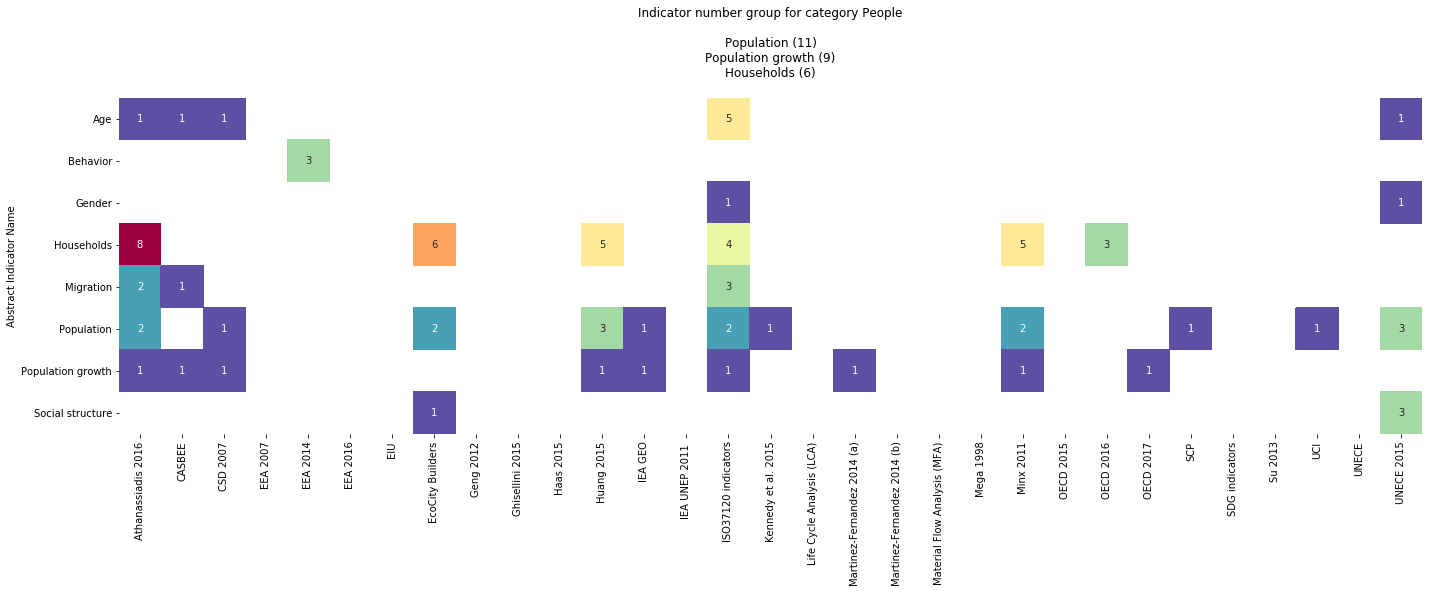

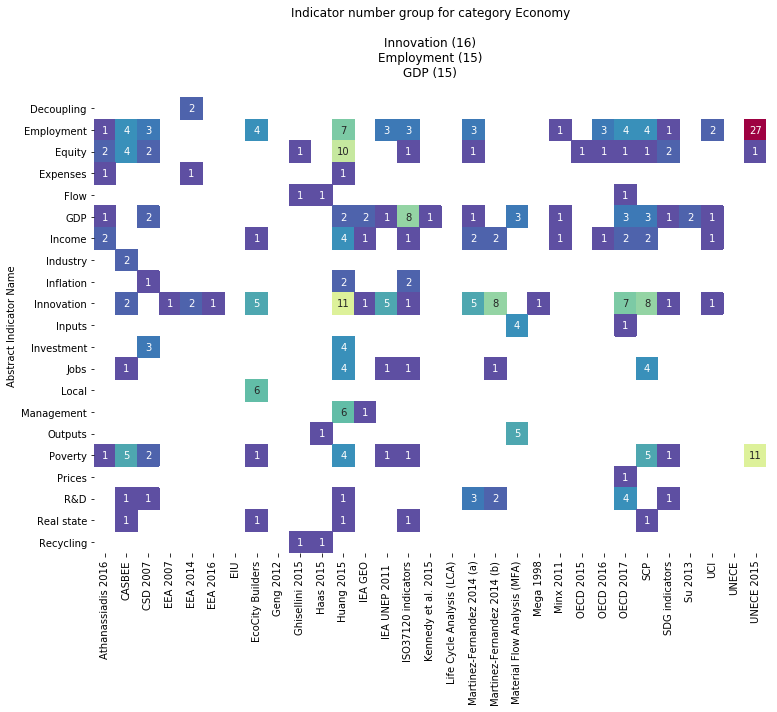

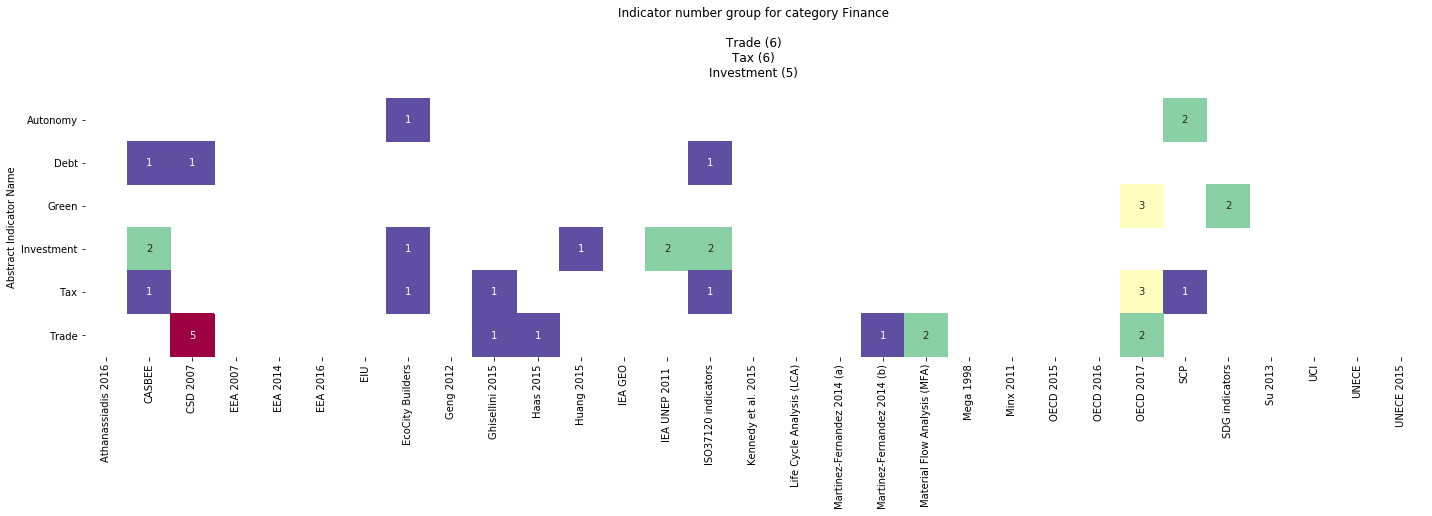

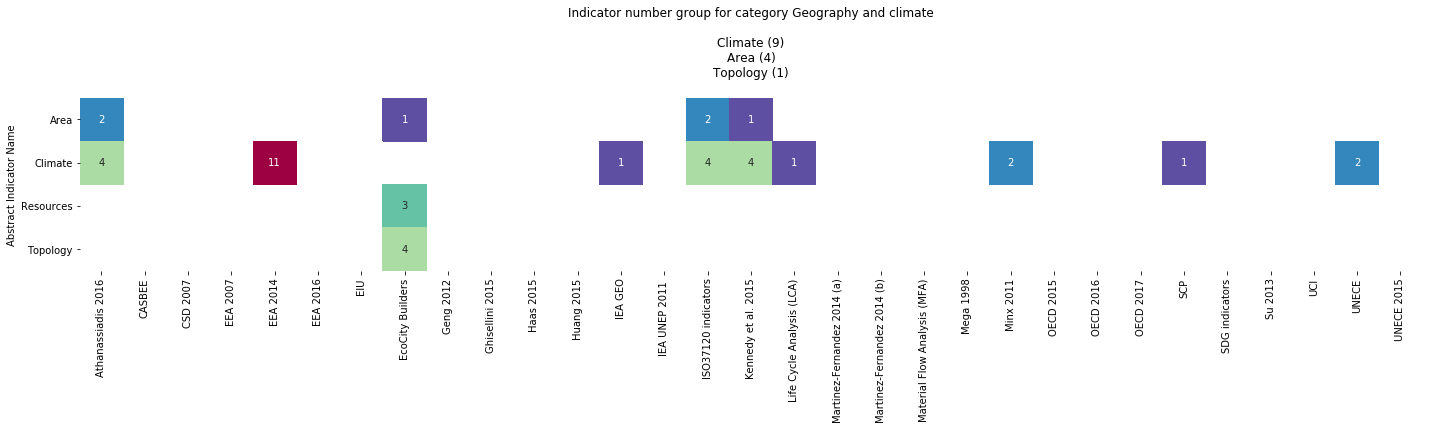

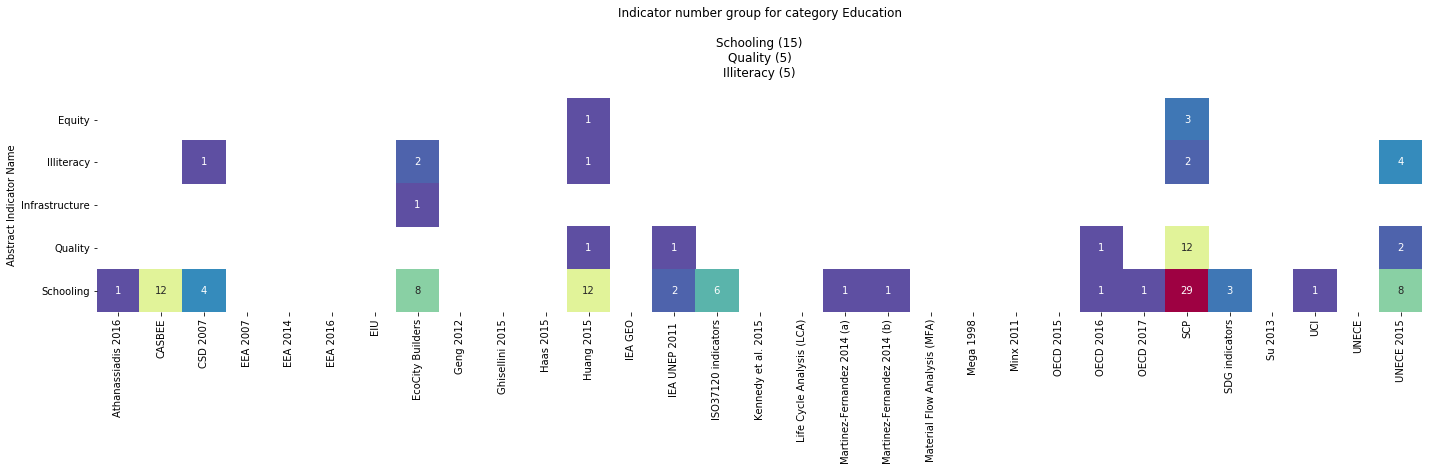

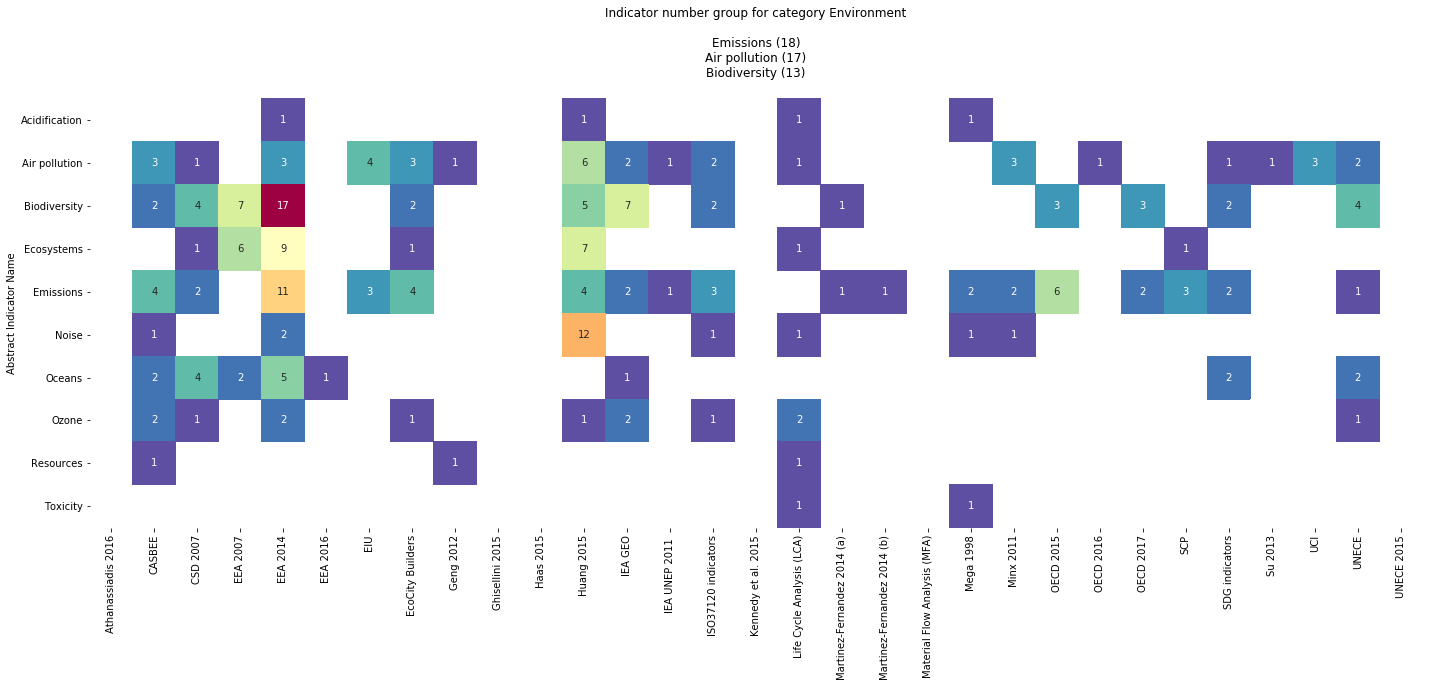

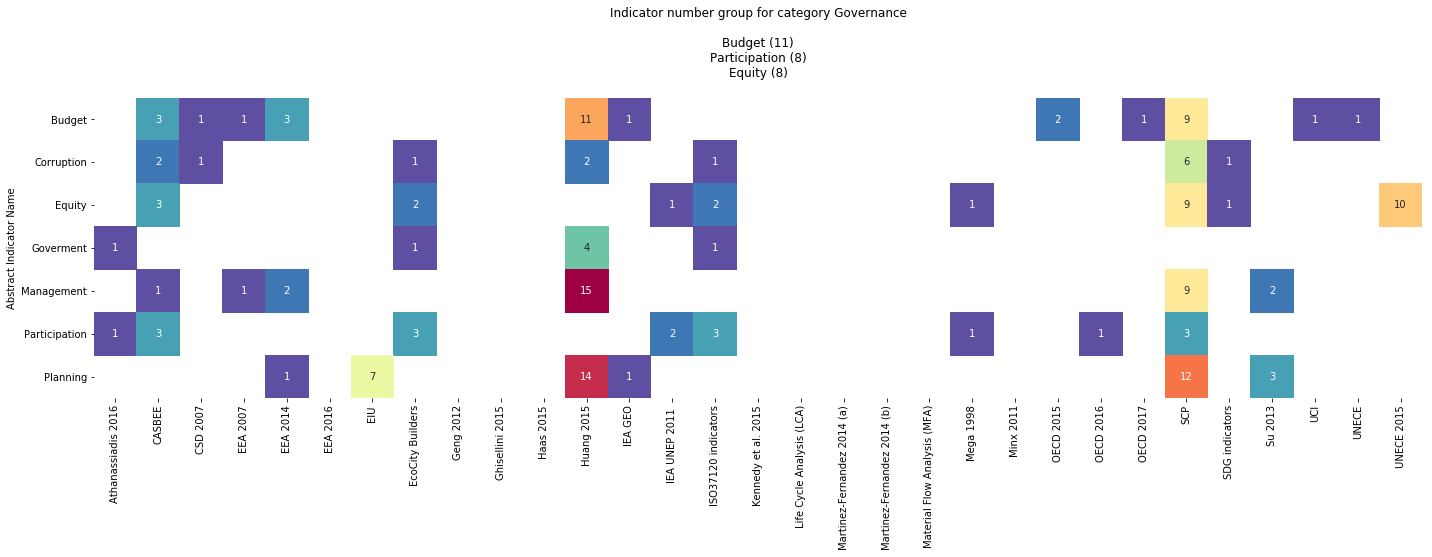

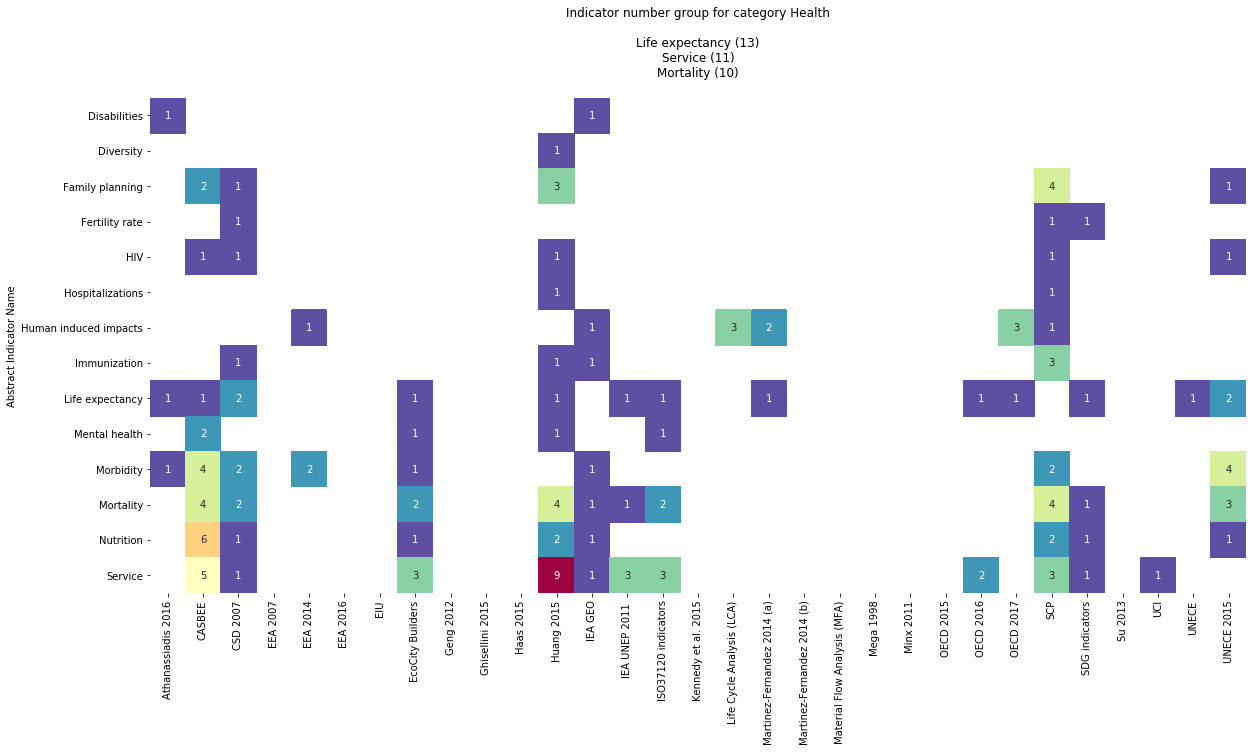

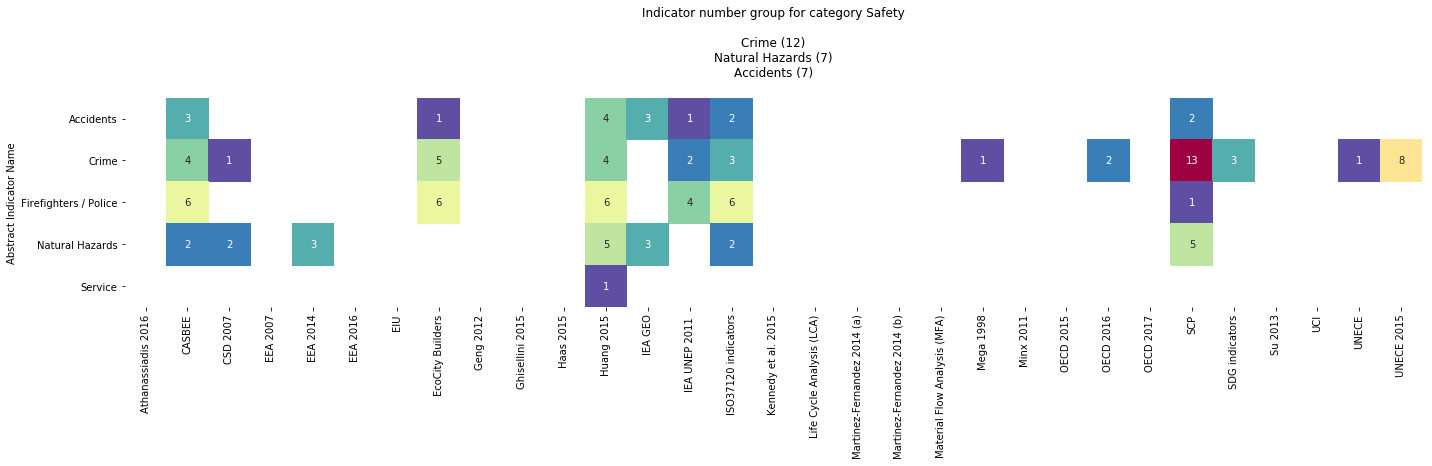

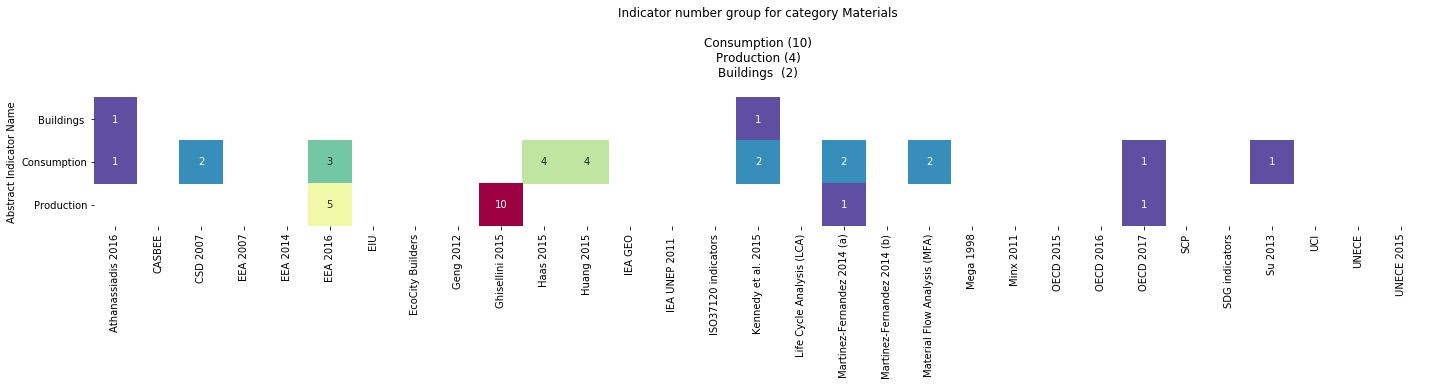

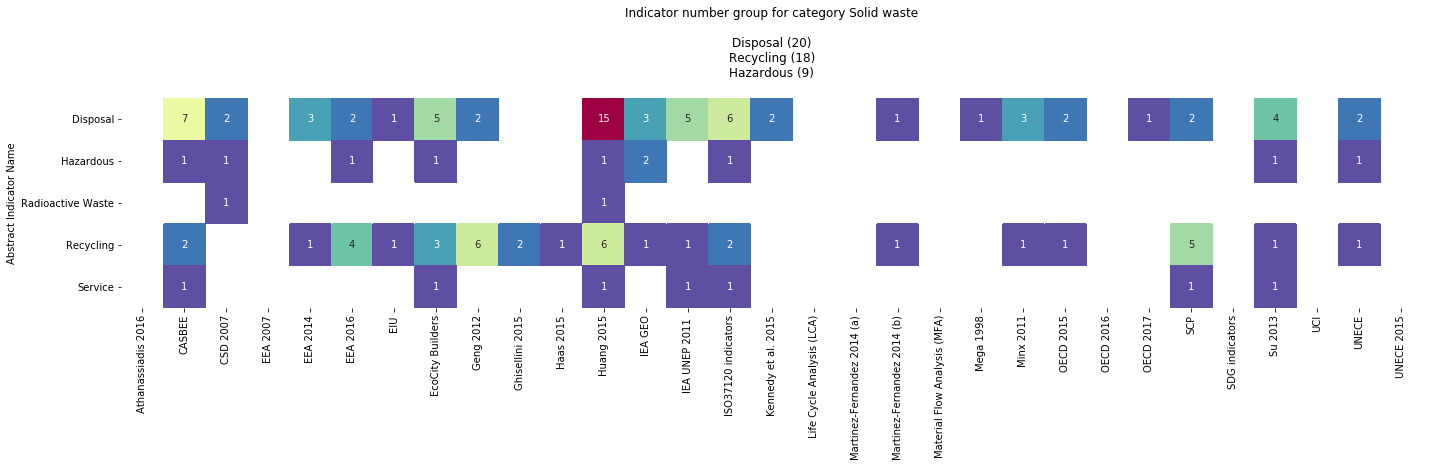

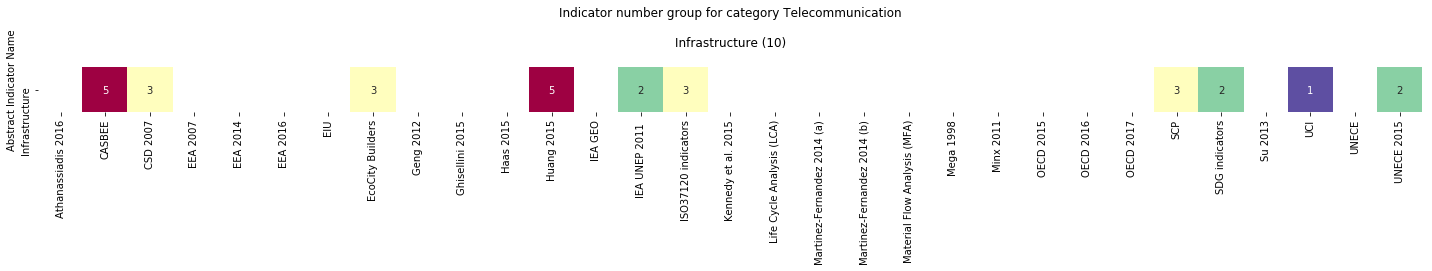

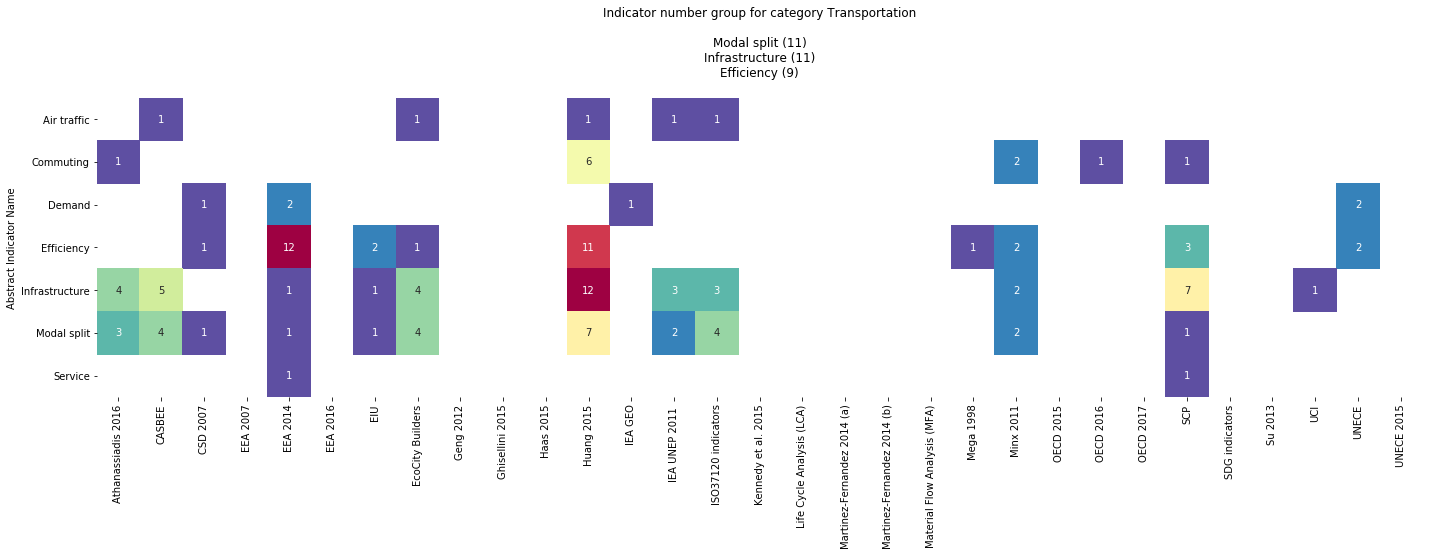

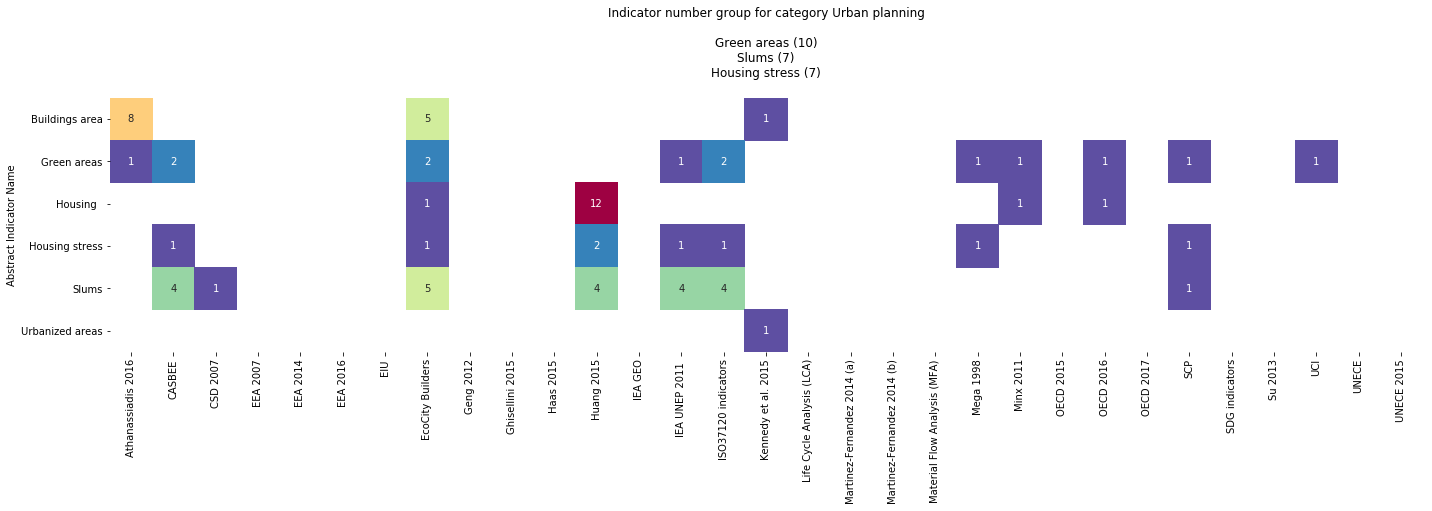

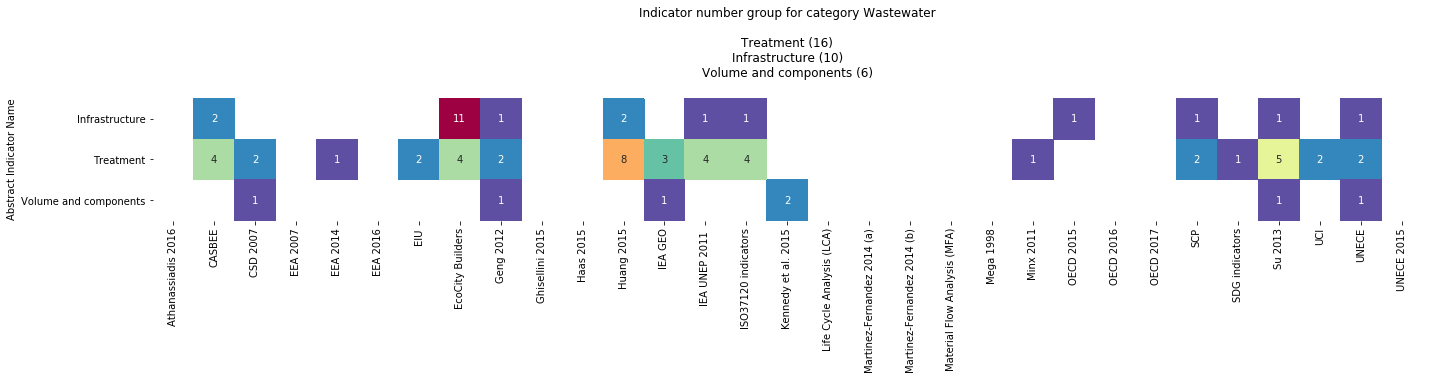

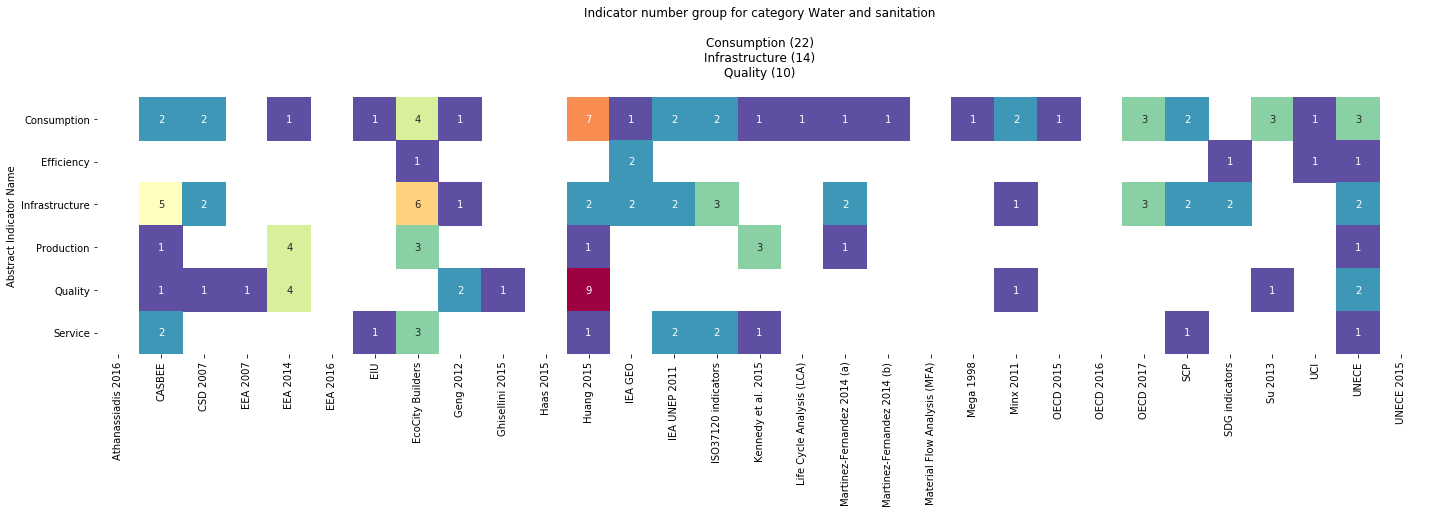

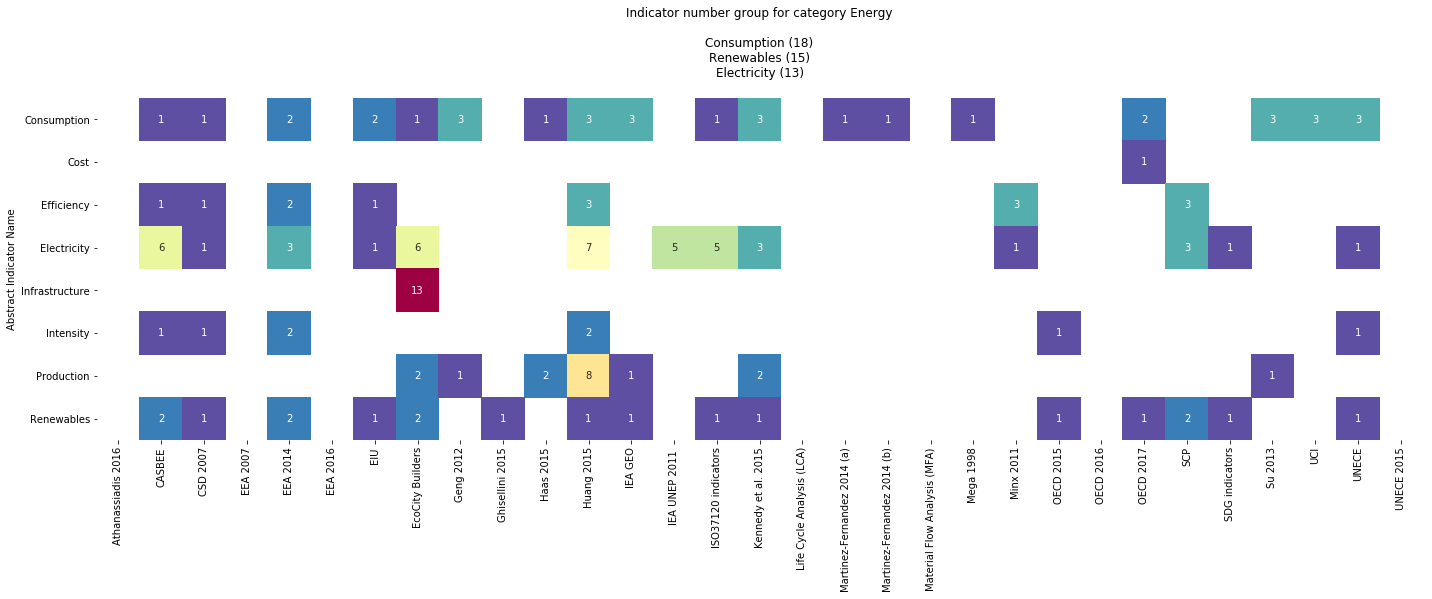

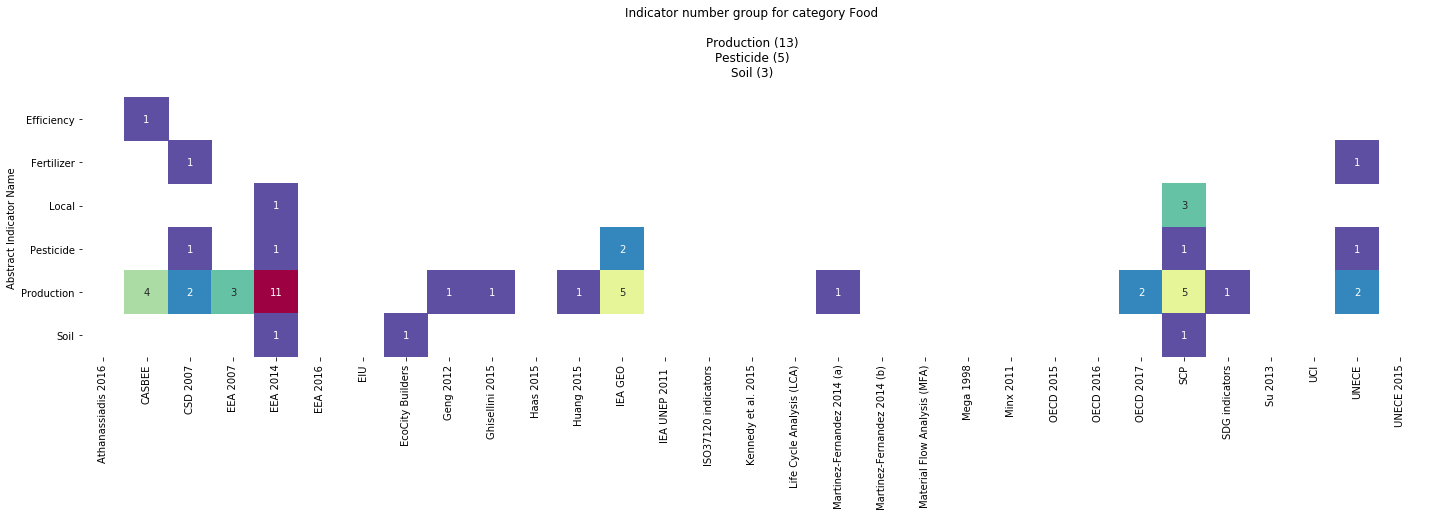

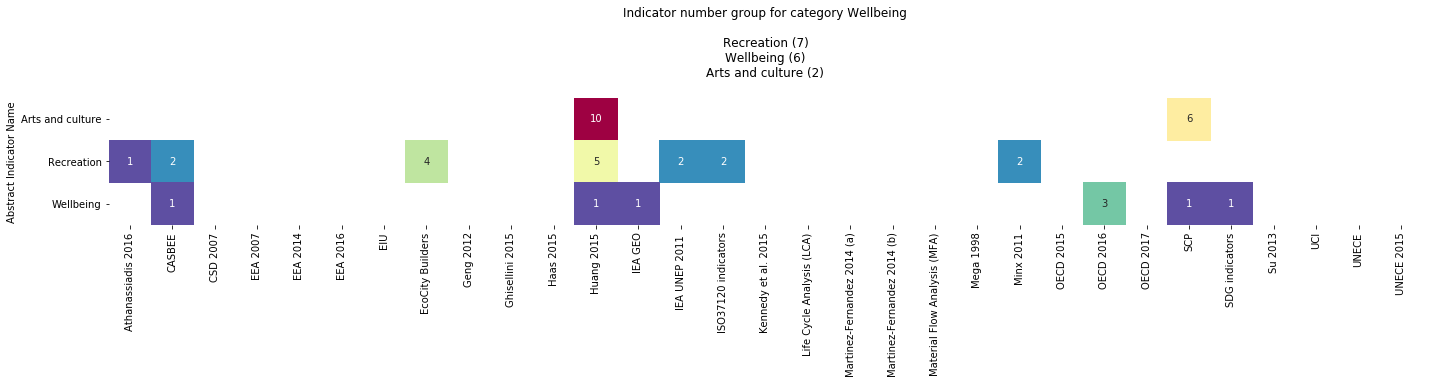

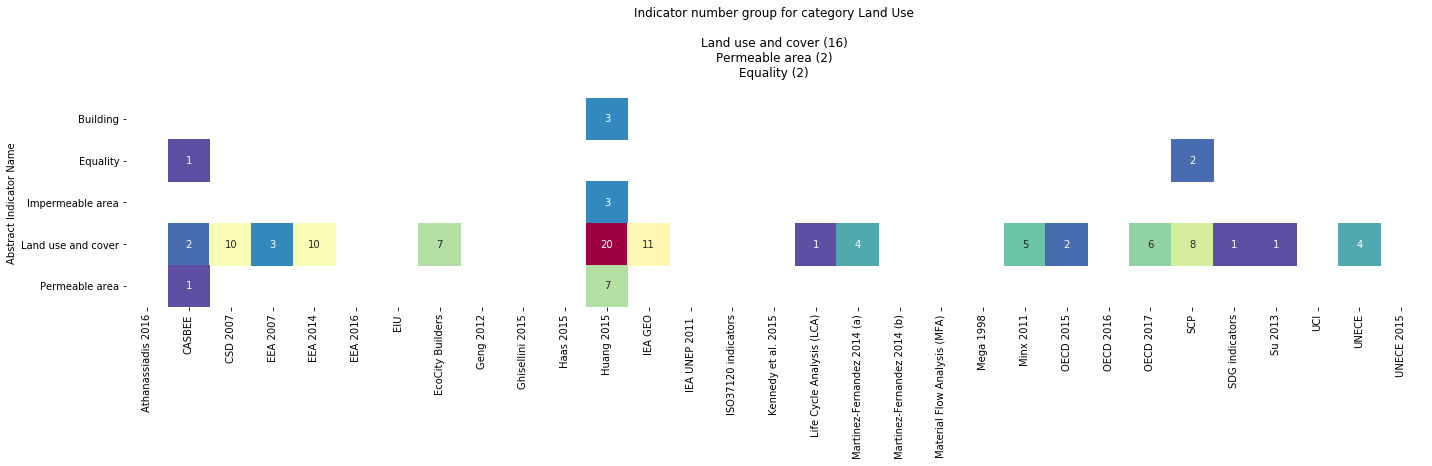

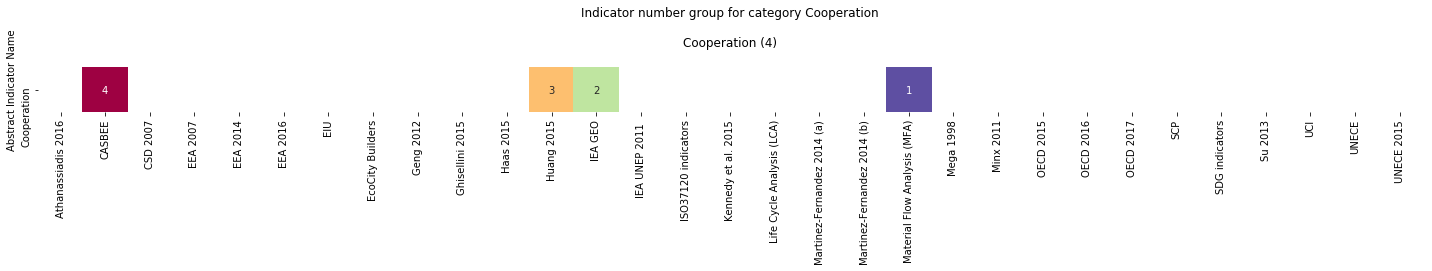

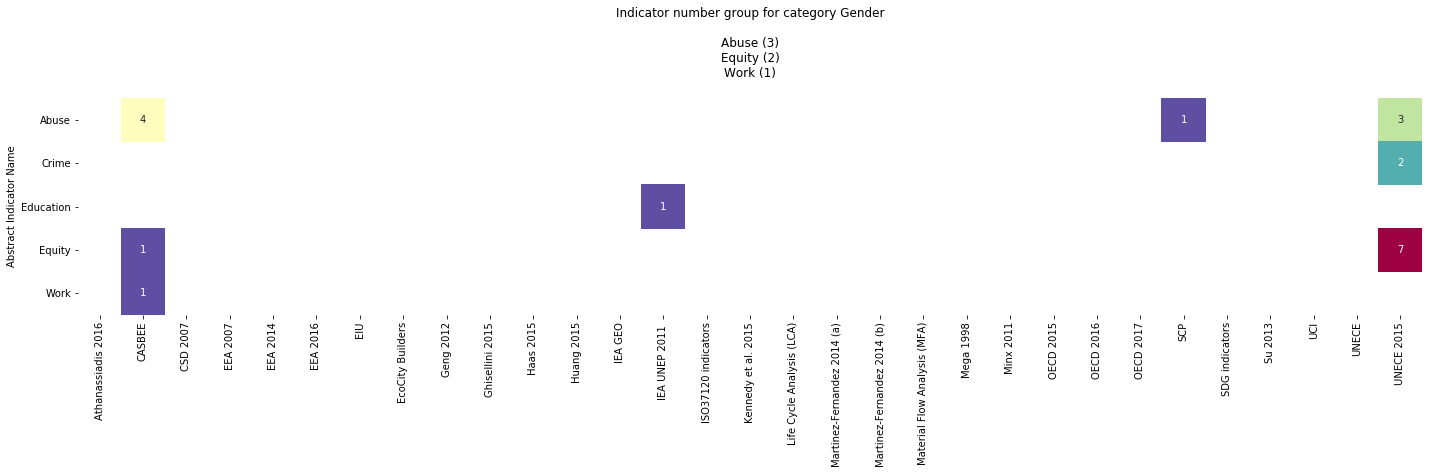

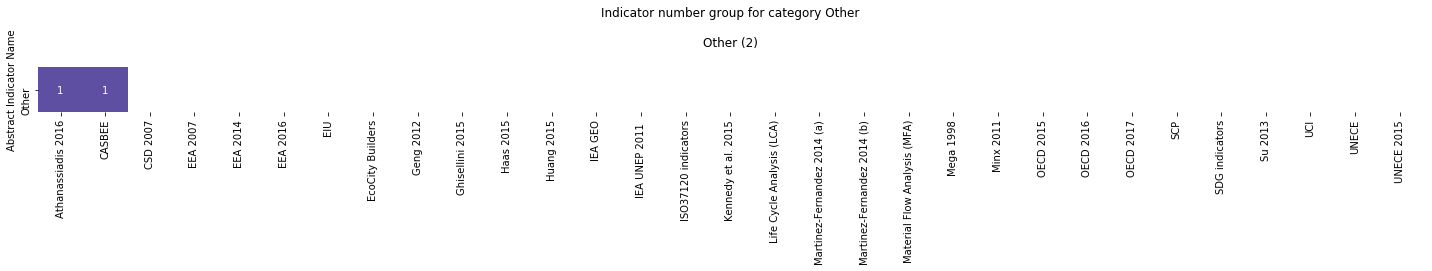

In [12]:
for cat in dataframe_trim_bin.loc[:, 'Category'].unique():
    group_dataframe = dataframe_trim_bin.loc[dataframe_trim_bin.Category == cat]
    sub_group_dataframe = group_dataframe.groupby(['Abstract Indicator Name']).sum()
    h = 1 * sub_group_dataframe.shape[0]
    fig, ax = plt.subplots(figsize=(20, 10))
    sns.heatmap(sub_group_dataframe, annot=True, ax=ax,
                cmap='Spectral_r', cbar=False, square=True)
    sub_group_dataframe[sub_group_dataframe >= 1] = 1
    a = sub_group_dataframe.sum(axis=1).sort_values(ascending=False)[0:4]
    b = "\n".join(["{} ({})".format(a.index[e], int(i)) for e, i in enumerate(a)][0:3])
    ax.set_title("Indicator number group for category {}\n\n{}\n".format(cat, b))
    fig.tight_layout()
    plt.savefig("heatmap_cat_{}.png".format(cat), dpi=300)

In [13]:
dataframe_map.sum()

Athanassiadis 2016               55.0
CASBEE                          190.0
CSD 2007                         98.0
EEA 2007                         25.0
EEA 2014                        147.0
EEA 2016                         17.0
EIU                              29.0
EcoCity Builders                193.0
Geng 2012                        23.0
Ghisellini 2015                  20.0
Haas 2015                        12.0
Huang 2015                      403.0
IEA GEO                          79.0
IEA UNEP 2011                    73.0
ISO37120 indicators             136.0
Kennedy et al. 2015              30.0
Life Cycle Analysis (LCA)        14.0
Martinez-Fernandez 2014 (a)      35.0
Martinez-Fernandez 2014 (b)      20.0
Material Flow Analysis (MFA)     17.0
Mega 1998                        15.0
Minx 2011                        49.0
OECD 2015                        21.0
OECD 2016                        23.0
OECD 2017                        65.0
SCP                             245.0
SDG indicato

In [14]:
dataframe_map_v = dataframe_map.sum(axis=1)
dataframe_map_v.sort_values(ascending=False).head(10)

Category     Abstract Indicator Name
Land Use     Land use and cover         95.0
Education    Schooling                  90.0
Economy      Employment                 70.0
Solid waste  Disposal                   69.0
Economy      Innovation                 60.0
Environment  Biodiversity               59.0
             Emissions                  54.0
Safety       Crime                      47.0
Wastewater   Treatment                  47.0
Energy       Electricity                43.0
dtype: float64